# Tâche 7
## Pics du diffractogramme du NiO2

La tâche de cette semaine consiste à trouver les 3 premiers pics du diffractogramme du NiO2 pour un rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å.

Voici mon analyse faite grâce au module de diffraction de Pymatgen.

In [14]:
import pymatgen.symmetry.analyzer as analyzer
from pymatgen.ext.matproj import MPRester 
from pymatgen.analysis.diffraction.xrd import XRDCalculator
import matplotlib.pyplot as plt


with MPRester("50GdfyPDwCnkOUl2") as m:
    material_id = "mp-543096"
    structure = m.get_structure_by_material_id(material_id)
    new_structure = analyzer.SpacegroupAnalyzer(structure).get_primitive_standard_structure()
    
    xrd = XRDCalculator('CuKa')
    pattern = xrd.get_pattern(structure)
    #print(pattern)
    #print(pattern.hkls)
    
    print("Le premier pic du diffractogramme correspondant à un rayonnement X incident Cu Kα se situe à un angle 2θ =",pattern.x[0],"° et a une intensité relative égale à", pattern.intensity[0],".")
    print("L'indice de Miller correspondant est : ",pattern.hkls[0][0])
    
    print("\n")
    
    print("Le deuxième pic du diffractogramme correspondant à un rayonnement X incident Cu Kα se situe à un angle 2θ =",pattern.x[1],"° et a une intensité relative égale à", pattern.intensity[1],".")
    print("L'indice de Miller correspondant est : ",pattern.hkls[1][0])
    
    print("\n")
    
    print("Le troisième pic du diffractogramme correspondant à un rayonnement X incident Cu Kα se situe à un angle 2θ =",pattern.x[2],"° et a une intensité relative égale à", pattern.intensity[2],".")
    print("L'indice de Miller correspondant est : ",pattern.hkls[2][0])
    
    

Le premier pic du diffractogramme correspondant à un rayonnement X incident Cu Kα se situe à un angle 2θ = 19.218531793774144 ° et a une intensité relative égale à 100.0 .
L'indice de Miller correspondant est :  {'hkl': (0, 0, 0, 1), 'multiplicity': 2}


Le deuxième pic du diffractogramme correspondant à un rayonnement X incident Cu Kα se situe à un angle 2θ = 37.09133511219488 ° et a une intensité relative égale à 23.19964287489083 .
L'indice de Miller correspondant est :  {'hkl': (1, 0, -1, 0), 'multiplicity': 6}


Le troisième pic du diffractogramme correspondant à un rayonnement X incident Cu Kα se situe à un angle 2θ = 39.006022497648125 ° et a une intensité relative égale à 3.987759954332589 .
L'indice de Miller correspondant est :  {'hkl': (0, 0, 0, 2), 'multiplicity': 2}


On remarque que l'analyse faite par Pymatgen nous donne 4 indices de Miller 'hkl'. Il s'agit en réalité d'une particuralité pour les réseaux trigonaux pour lesquels on définit parfois un quatrième indice pour désigner les plans (hkil) : il s'agit de la notation de Bravais-Miller.

Le nouvel indice i est en fait redondant et vaut : 
\begin{equation}
i = -h-k
\end{equation}
"Cette notation permet d'appliquer des permutations circulaires d'indices pour définir des familles de plans." (Indices de Miller et indices de direction. 2021. Dans Wikipédia. https://fr.wikipedia.org/wiki/Indices_de_Miller_et_indices_de_direction).

Une dernière remarque concernant la multiplicité : celle-ci nous donne le nombre de plans équivalents d'une famille d'une famille (même d_hkl et même facteur de structure)

### Voici le diffractogramme complet pour le NiO2 : 

Text(0.5, 1.0, 'Calculated X-ray diffraction patterns (relative intensity)')

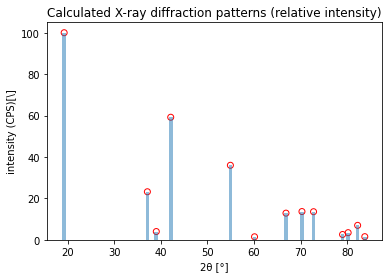

In [15]:
plt.figure()
plt.scatter(pattern.x,pattern.intensity,facecolors='none', edgecolors='r')
plt.bar(pattern.x,pattern.intensity, align='center', alpha=0.5)
plt.xlabel("2θ [°]")
plt.ylabel("intensity (CPS)[\]")
plt.title("Calculated X-ray diffraction patterns (relative intensity)")